<a href="https://colab.research.google.com/github/sagar2582/Capstone-1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connecting drive to import the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone -1 Exploratory Data Analysis/Hotel Bookings.csv')

In [4]:
# First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
print("The shape of our dataset is : ", df.shape)

The shape of our dataset is :  (119390, 32)


In [7]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Our dataset has {rows} and {columns} columns")

Our dataset has 119390 and 32 columns


### Check for Null values 

In [8]:
# Check for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Looking at the above tables we see two type of hotels in the 'hotel' column of out dataset. Let's Find out 

In [9]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

### From the above dicovery we will be looking forward for a bivariate analysis between the two types of hotel and find great patterns and insights for the both of them.

## Pre-Processing & Encoding

In [10]:
# Information about the datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Checking through the number of adults in the adult column
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [12]:
# Checking through the number of children
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


In [13]:
# Checking through the number of babies 
df['babies'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0
Resort Hotel,40060.0,0.013904,0.118998,0.0,0.0,0.0,0.0,2.0


### Looking at the above numbers it seems that the mean values of adults and children are higher than that of babies which indicates that most of the hostel are family freindly and can accomodate large families

### Abonding the idea of combining and making a seperate family column as it may not be that useful and will be greatly baised, some guests maybe single and some may not have kids.

### Combining reserved_room_type and assigned_room_type to a single column to check weather the room that booked was assigned or not

Reserved room == Assigned room --->  1

Reserved room != Assigned room --->  0

In [14]:
df['booking_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'], '1', '0')

In [15]:
df['booking_room'].value_counts()

1    104473
0     14917
Name: booking_room, dtype: int64

In [16]:
# Dropping both the above columns
df.drop(['reserved_room_type', 'assigned_room_type'], axis =1, inplace =True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Exploratory Data Analysis

In [18]:
# Let's find out the dominant hotel type in the data
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

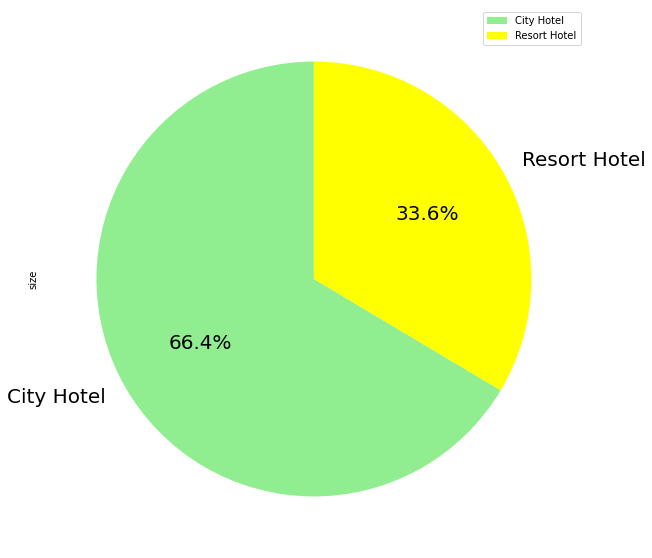

In [19]:
# Since there are only two type using a pie chart will be better of visual understanding
plt.rcParams['figure.figsize'] = 10,10

pie_frame = pd.DataFrame({'size' : [79330, 40060],
                   'index' : ['City Hotel', 'Resort Hotel']})
pie_frame.plot.pie(y='size', labels = ['City Hotel', 'Resort Hotel'], colors = ['lightgreen', 'yellow'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

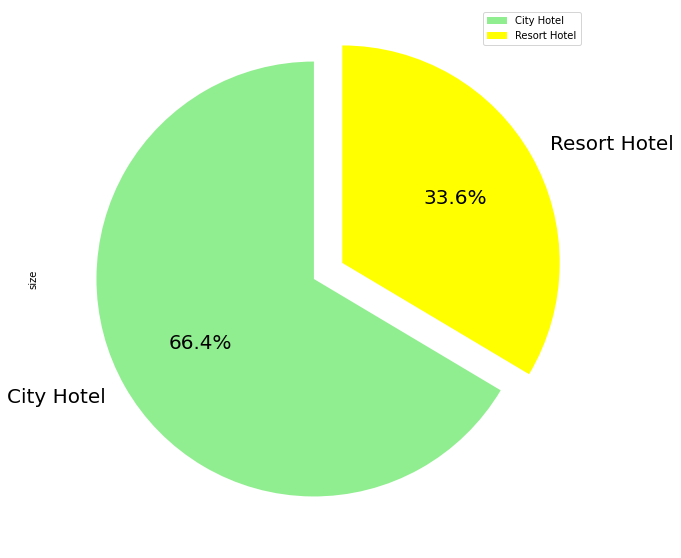

In [20]:
plt.rcParams['figure.figsize'] = 10,10

pie_frame = pd.DataFrame({'size' : [79330, 40060],
                   'index' : ['City Hotel', 'Resort Hotel']})
pie_frame.plot.pie(y='size', labels = ['City Hotel', 'Resort Hotel'], colors = ['lightgreen', 'yellow'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20}, explode = (0,0.15))


# Explanation
# Labels -> Help telling the which category the chunck lies in
# color -> Assigning different colors to different category always help in visualization and ease of understanding
# autopct='%1.1f%%' -> calculated and prints the percentage of each chunck
# startangle=90 -> Starts the pie Chart splitting in the cloackwise direction (organised manner)
# textprops -> Control the fontsize accordingly, because I don't want the review board to be rubbing there eyes.
# explode -> Splitting chucks with control over the distance you wanna keep them away

### Analysing different population of Visitor in different hotels

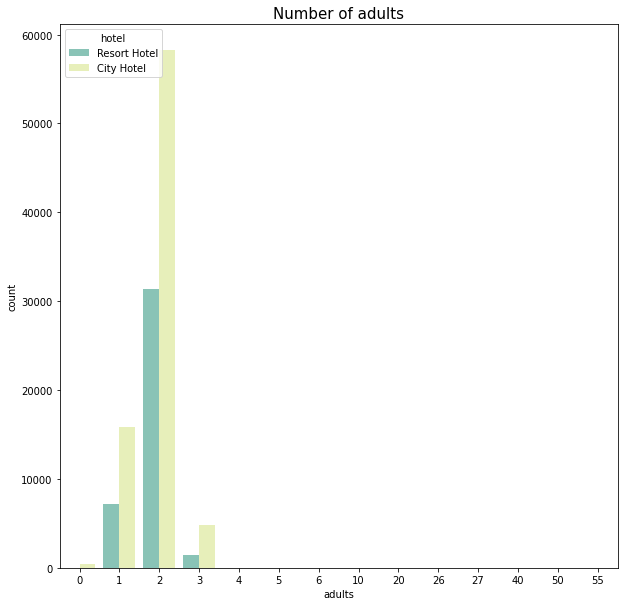

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'adults', hue = 'hotel', palette= ["#7fcdbb", "#edf8b1"])
plt.title('Number of adults', fontsize = 15)
plt.show()

### Most adults arrive in a pair

### Now let's take a look at the children and baby figure

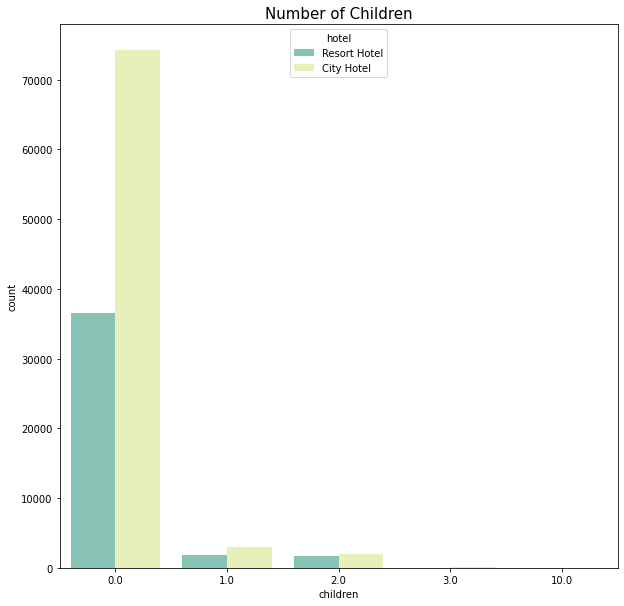

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'children', hue = 'hotel', palette= ["#7fcdbb", "#edf8b1"])
plt.title('Number of Children', fontsize = 15)
plt.show()

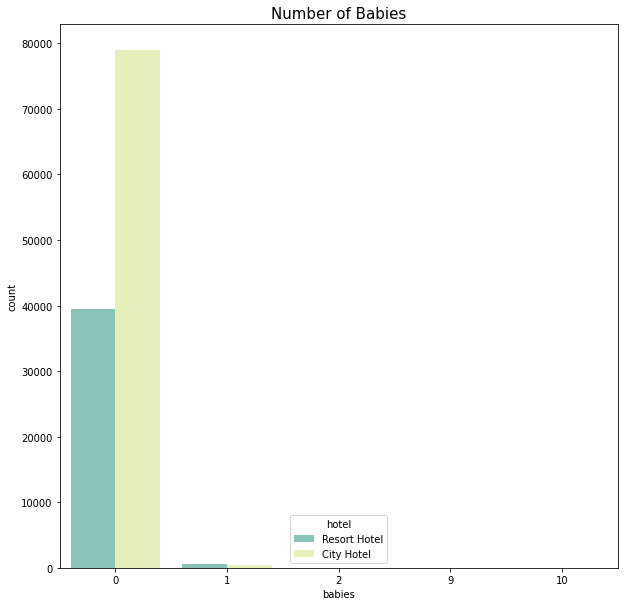

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'babies', hue = 'hotel', palette= ["#7fcdbb", "#edf8b1"])
plt.title('Number of Babies', fontsize = 15)
plt.show()

### One thing is clear that our target audience and most majority population are adults.
### And by pair we have give out a hypothesis of couples and youngsters

###people with children and baby have no specific choices of the type of hotels. 

### Let's dive into the arrival_date_year column

In [24]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [25]:
df['arrival_date_year'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
Resort Hotel,40060.0,2016.121443,0.722347,2015.0,2016.0,2016.0,2017.0,2017.0


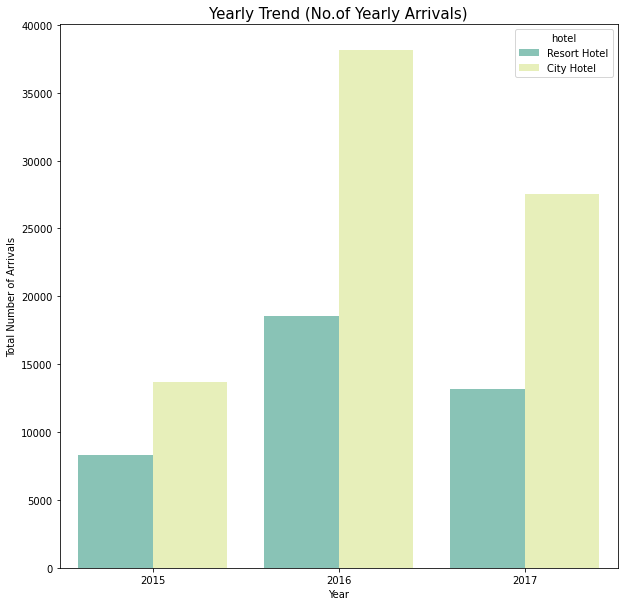

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel', palette= ["#7fcdbb", "#edf8b1"])
plt.title('Yearly Trend (No.of Yearly Arrivals)', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Total Number of Arrivals')
plt.show()

### 2016 was the year where the most hotel booking would have take taken place, and with hotel booking comes the rate of cancellation of the booking among the type of the hotel, which is an important factor to visualize.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [32]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [34]:
# Categorical Type, 1 - > canceled because a hunch says that cancelation can never be greater than the no-canceled bookings
# 0 - > Not canceled 
# Labeling this column for better understanding

df['is_canceled'] = np.where(df['is_canceled'] == 1, 'canceled', 'not_canceled')

In [36]:
df['is_canceled'].value_counts()

not_canceled    75166
canceled        44224
Name: is_canceled, dtype: int64

In [35]:
df['is_canceled'].groupby(df['hotel']).describe()

,count,unique,top,freq
hotel,,,,
City Hotel,79330,2,not_canceled,46228
Resort Hotel,40060,2,not_canceled,28938


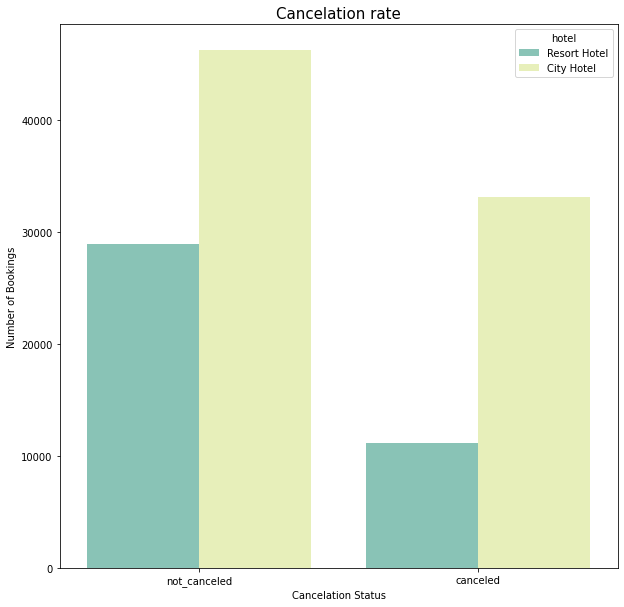

In [45]:
# plotting a count plot for better understanding

plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel', palette= ["#7fcdbb", "#edf8b1"])
plt.title('Cancelation rate', fontsize = 15)
plt.xlabel('Cancelation Status')
plt.ylabel('Number of Bookings')
plt.show()

### Since 66 percent of the hotels were city hotel thus as excpected the the cancelation in the city hotels were higher but if we take the rate of canceleation into consideration we see that there is not much noticable diference between the both of them comapred to the numbers and weightage 

### Now that we have checked the cancelation rate. Let's find out the best months where the most number of arrivals took place so we can target our audience at the most suited time.

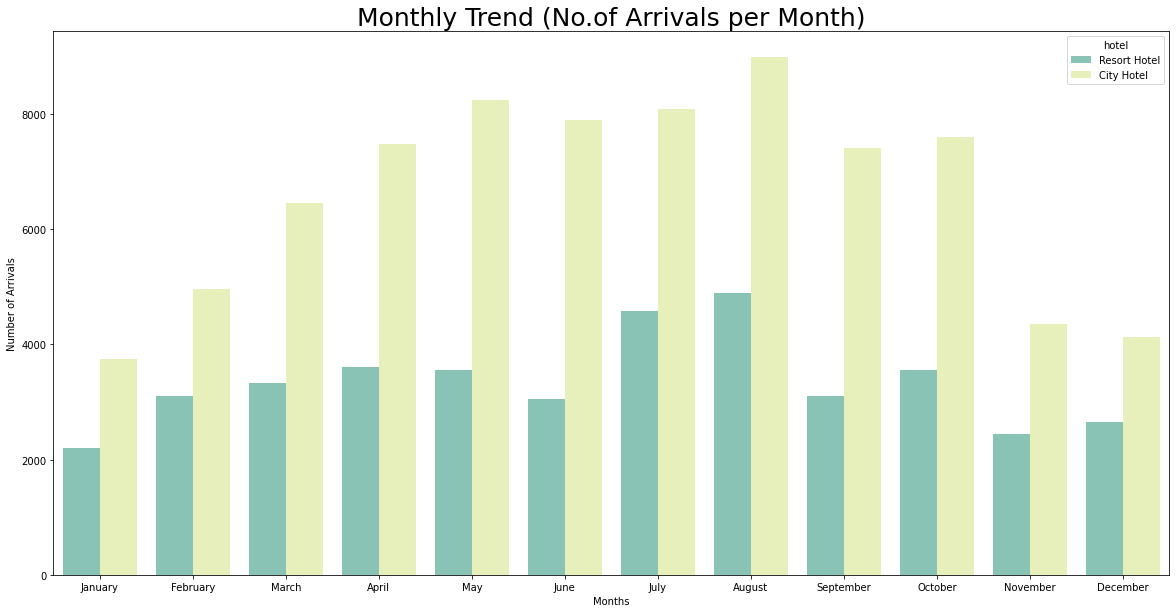

In [42]:
# Since we need the order of the months was not sorted, we have to do it manually

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(20,10))
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order = month_order, palette= ["#7fcdbb", "#edf8b1"])
plt.title('Monthly Trend (No.of Arrivals per Month)', fontsize = 25)
plt.xlabel('Months')
plt.ylabel('Number of Arrivals')
plt.show()

### From the above chart we observe that most number of arrivals are taking place from April to August as it explains "Summer Season" is the most prefered season for a vacation and for families with children find time during the Summer breaks of thier kids. Thus; we have a more specific duration to target the audience.